## LOAN PREDICTION USING DIFFERENT MACHINE LEARNING  MODELS

####         Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Importing the data

In [2]:
tk = pd.read_csv('loan customer data.csv')

In [3]:
tk.head()   # checking the overview of our data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(tk.shape)

# from this we can see that the data containes 13 columns and there 614 observations in the dataset

(614, 13)


#### Data Exploration

  #### What is Data Exploration? 
  
 - Data exploration is the first step in data analysis involving the use of data visualization tools and statistical techniques     to uncover data set characteristics and initial patterns
  
  #### Why is It Important to do data exploration?
  
 - Data exploration allows for a deeper undersyanding of the dataset, it is done to know about the characteristics and potential     problmes of the dataset which makes it easier to navigate and use the data later 


In [5]:
# I will start by exploring the categorical variable that is the Load ID column
tk.Loan_ID.value_counts(dropna=False)

# .value_counts() is a function in pandas that is used to count the unique values in a particular column of a dataframe
# the drop na syntax means i am not removing any missing values that could be in this column

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

we can see that  they are 614 unique IDs from customers in the dataset

In [6]:
# next one is going to be gender 
tk.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

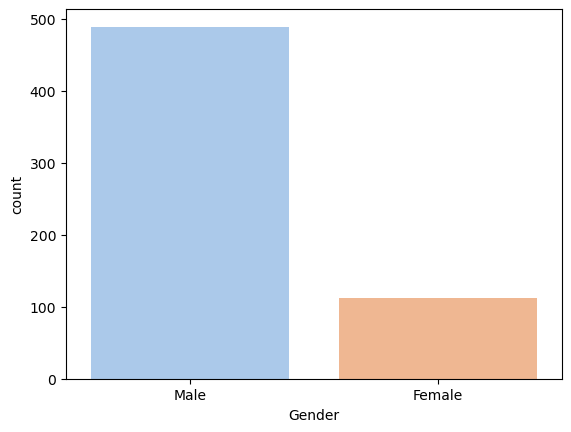

In [7]:
# plotting the gender graph to get a visualization of the difference of males and feamles that have applied for a loan 

sns.countplot(x="Gender", data=tk, palette="pastel")
plt.show()

In [8]:
# count of the number of male, female, and null values in the "Gender" column of our dataframe
countMale = len(tk[tk.Gender == 'Male'])
countFemale = len(tk[tk.Gender == 'Female'])
countNull = len(tk[tk.Gender.isnull()])

# printing out the percentage of male and female applicants, as well as the percentage of missing values in the "Gender" 
#column of the DataFrame df

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(tk.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(tk.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


 - Inclusively this code provides a quick way to get a sense of the gender balance of the applicant pool for persoanl loans in     bank and the percentage of missing values in the Gender column.
 
 - And with that we can see that there are males than females that applied for a loan in the bank 

In [9]:
# next one is going to be Education 

tk.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

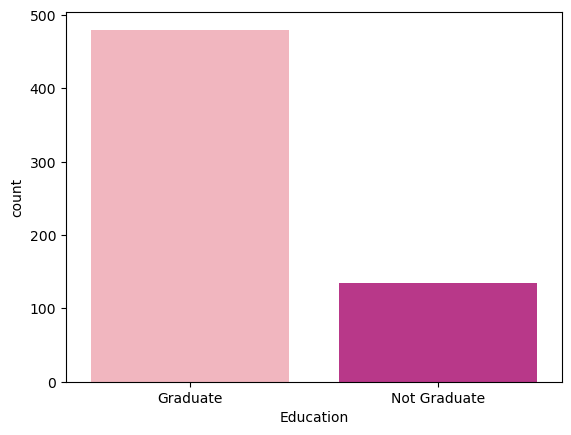

In [10]:
sns.countplot(x="Education", data=tk, palette="RdPu")
plt.show()

# here we can get a visualization of the two categories under the educational level that is graduate and none graduate

In [11]:
countGraduate = len(tk[tk.Education == 'Graduate'])
countNotGraduate = len(tk[tk.Education == 'Not Graduate'])
countNull = len(tk[tk.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(tk.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(tk.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


- With this information we can see that they are more graduates applying for loans than none graduates 

In [12]:
# next one is going to be married 
tk.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

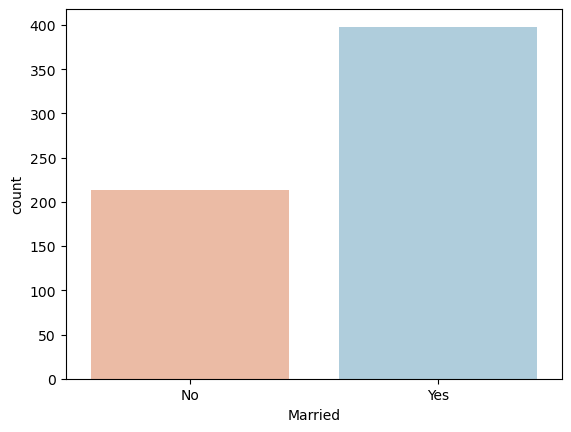

In [13]:
sns.countplot(x="Married", data=tk, palette="RdBu")
plt.show()

In [14]:
countMarried = len(tk[tk.Married == 'Yes'])
countNotMarried = len(tk[tk.Married == 'No'])
countNull = len(tk[tk.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(tk.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(tk.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


- With this information we can notice that they are more married people applying for the loans more than the unmarried people

In [15]:
# next one is going to be self employed 
tk.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

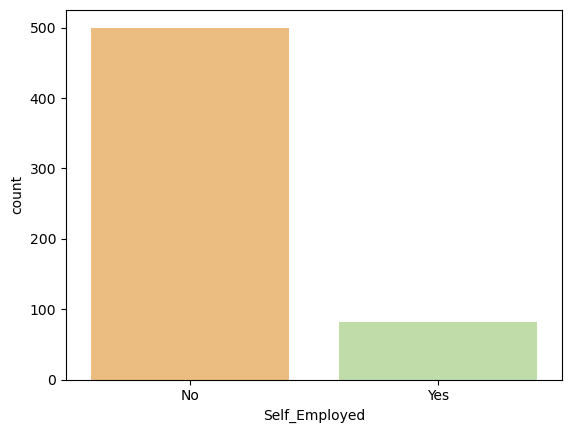

In [16]:
sns.countplot(x="Self_Employed", data=tk, palette="Spectral")
plt.show()

In [17]:
countNo = len(tk[tk.Self_Employed == 'No'])
countYes = len(tk[tk.Self_Employed == 'Yes'])
countNull = len(tk[tk.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(tk.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(tk.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


- We can see that they are less self employed individuals applying than those that are not self employed and this column has a higher percentage of missing values than the other ones that we looked at

In [18]:
# next one is Credit History
# When a bank is issueing out loans it important that we know if the customer applying for a loan has applied for a
# loan or loans before 
tk.Credit_History.value_counts(dropna=False)


1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

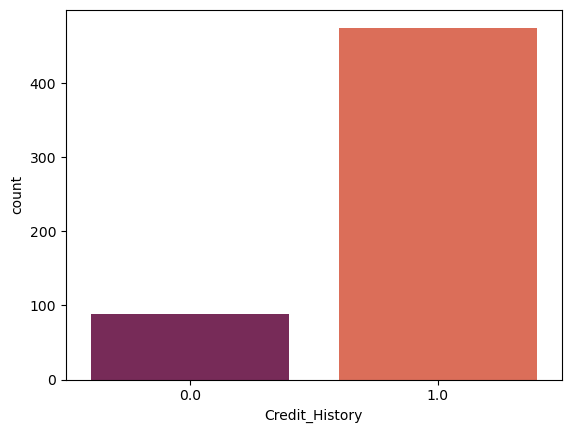

In [19]:
sns.countplot(x="Credit_History", data=tk, palette="rocket")
plt.show()

In [20]:
count1 = len(tk[tk.Credit_History == 1])
count0 = len(tk[tk.Credit_History == 0])
countNull = len(tk[tk.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(tk.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(tk.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


- We can see that there are more applicants with good credit history than those who have bad credit history

In [21]:
# next one is going to be loan status
# Y stands for YES/APPROVED 
# N stands for N0/REJECTED
tk.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

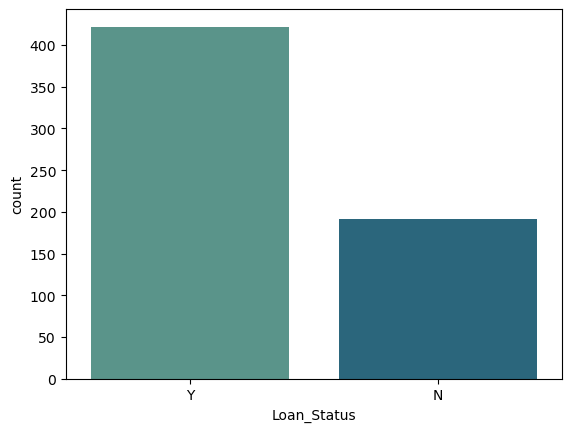

In [22]:
sns.countplot(x="Loan_Status", data=tk, palette="crest")
plt.show()

In [23]:
countY = len(tk[tk.Loan_Status == 'Y'])
countN = len(tk[tk.Loan_Status == 'N'])
countNull = len(tk[tk.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(tk.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(tk.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


- We can notice that the number of approved loans is greater than the rejected ones and that they are no missing values in this column

In [24]:
# the next one is property area 
# When a bank considers a customer for a loan, one of the factors they look at is the property area
# This is because the property area gives an indication of the value of the property, and therefore the amount that may 
# be borrowed against it and also banks also consider the property area when evaluating the potential resale value of the property
tk.Property_Area.value_counts(dropna=False)


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

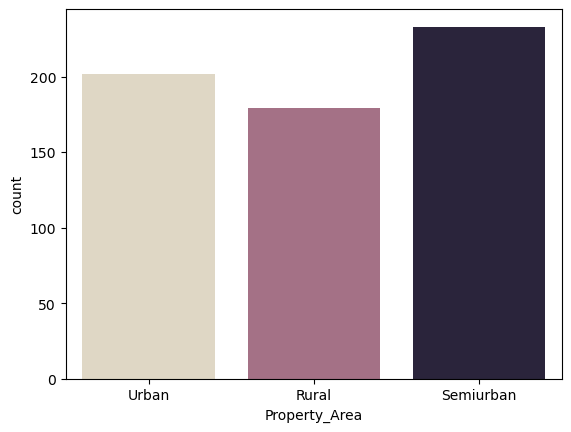

In [25]:
sns.countplot(x="Property_Area", data=tk, palette="ch:s=-.2,r=.6")
plt.show()

In [26]:
countUrban = len(tk[tk.Property_Area == 'Urban'])
countRural = len(tk[tk.Property_Area == 'Rural'])
countSemiurban = len(tk[tk.Property_Area == 'Semiurban'])
countNull = len(tk[tk.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(tk.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(tk.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(tk.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


- We can note that they is a fair distribution of the property area and no missing values in the column 

In [27]:
# next one is loan amount term 
# loan amount term is the length of time over which the customers repay the borrowed funds with interest
# The loan amount term is an important part of the loan application because it determines how much money the borrower will 
#receive and how long they have to pay it back.
# The loan amount term can also impact the interest rate, monthly payments, and overall cost of the loan

tk.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

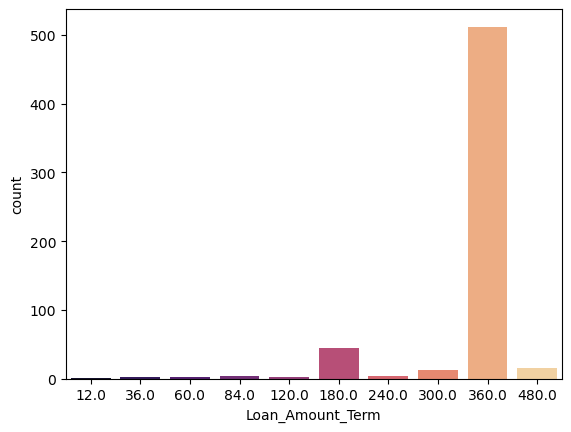

In [28]:
sns.countplot(x="Loan_Amount_Term", data=tk, palette="magma")
plt.show()

In [29]:
# from the graph we can see that we have different loan durations ranging from 12 days up to 360 days and some are common and some are not

In [30]:
count12 = len(tk[tk.Loan_Amount_Term == 12.0])
count36 = len(tk[tk.Loan_Amount_Term == 36.0])
count60 = len(tk[tk.Loan_Amount_Term == 60.0])
count84 = len(tk[tk.Loan_Amount_Term == 84.0])
count120 = len(tk[tk.Loan_Amount_Term == 120.0])
count180 = len(tk[tk.Loan_Amount_Term == 180.0])
count240 = len(tk[tk.Loan_Amount_Term == 240.0])
count300 = len(tk[tk.Loan_Amount_Term == 300.0])
count360 = len(tk[tk.Loan_Amount_Term == 360.0])
count480 = len(tk[tk.Loan_Amount_Term == 480.0])
countNull = len(tk[tk.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(tk.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(tk.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(tk.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


#### analyzing numerical columns

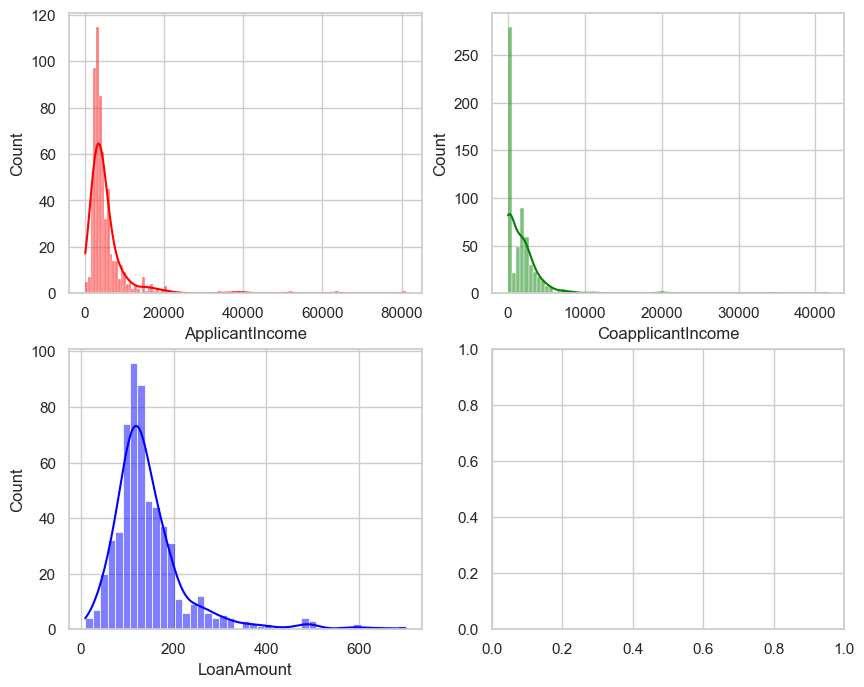

In [31]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=tk, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=tk, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='green')
sns.histplot(data=tk, x="LoanAmount", kde=True, ax=axs[1, 0], color='blue');

- Here we have graphical presentation of the numerical variables 

##### Matrix Plot

- Matrix Plots allows you to quickly assess all relationships in a data set.
- HeatMap is the type of matrix plot that we are going to be plotting , Heatmaps are commonly used to represent the correlation between different variables

In [32]:
tk.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Axes: >

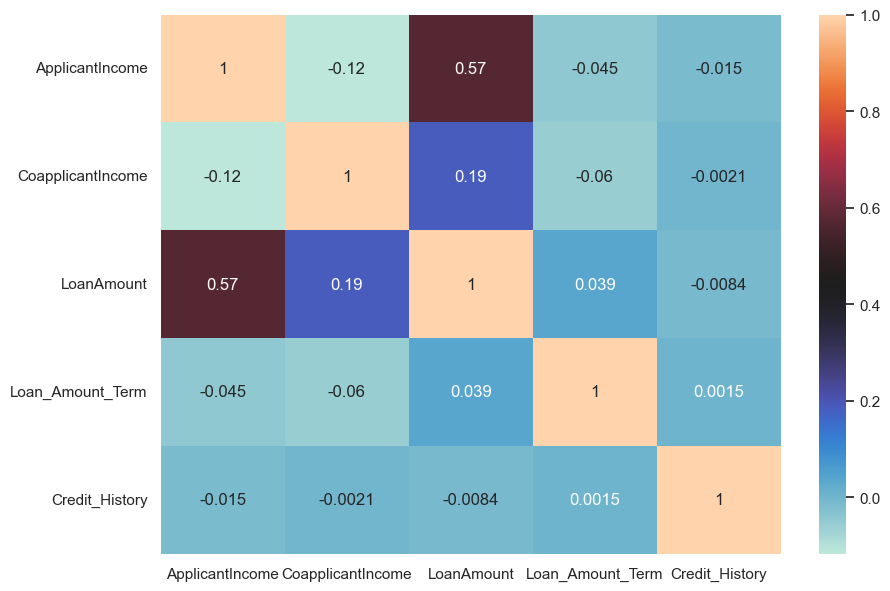

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(tk.corr(), annot=True, cmap='icefire')

- From the heatmap above we can note that these variables variables have different correlations. 
- A positive correlation indicates that as one variable increases, so does the other variable.
- A negative correlation indicates that as one variable increases, the other variable decreases.
- So we can note that there is a positive correlation between ApplicantIncome and LoanAmount

######  Bivariate Analysis
- Bivariate analysis explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.
- So there is going to be numerical with numerical, categorical with categorical and numerical with categorical

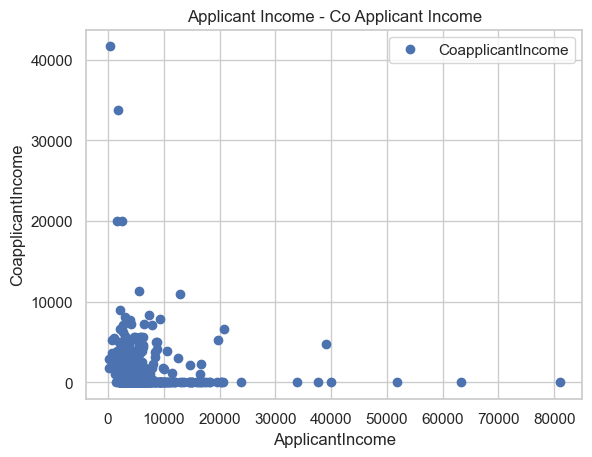

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40)


In [34]:
# NUMERICAL TO NUMERICAL 

tk.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', tk['ApplicantIncome'].corr(tk['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(tk['ApplicantIncome'], tk['CoapplicantIncome']))

- Here we can see that there is negative correlation between Applicant income and Co Applicant Income.
- The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

In [35]:
# CATEGORICAL TO CATEGORICAL


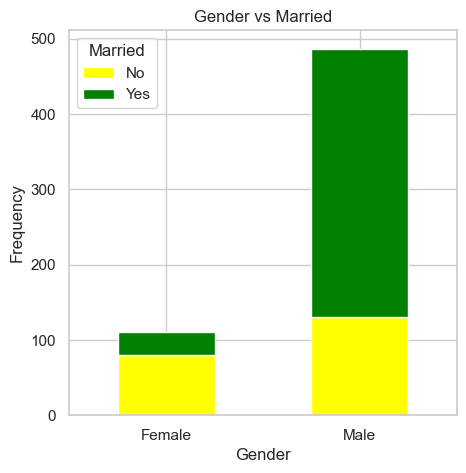

In [36]:
pd.crosstab(tk.Gender,tk.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['yellow','green'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

- From the plot above we can note that there are more married male applicants than the married female applicants
- But we can also see that they are more unmarried males than unmarried females , so in overall there are more male applicants 

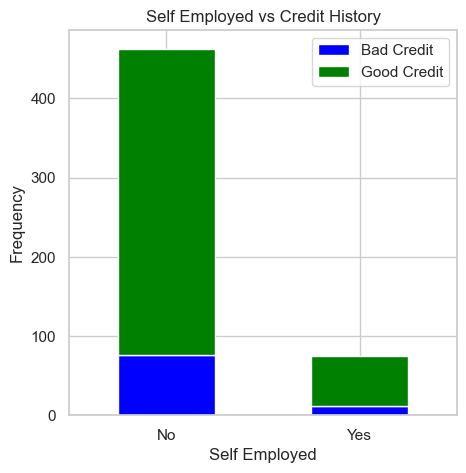

In [37]:
pd.crosstab(tk.Self_Employed,tk.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['blue','green'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

- we can see that most one self employed have good credit 

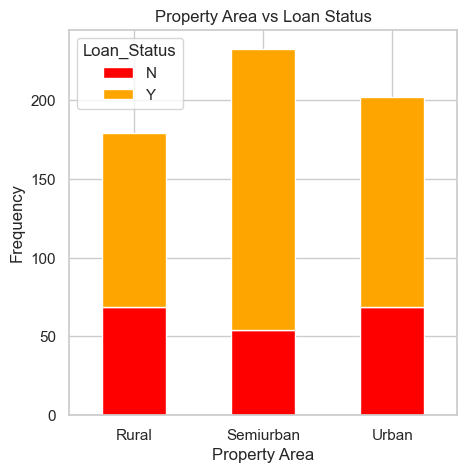

In [38]:
pd.crosstab(tk.Property_Area,tk.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['red','orange'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

- we can note that most of the people accepted have property in the semiurban area

In [39]:
# CATEGORICAL TO NUMERICAL


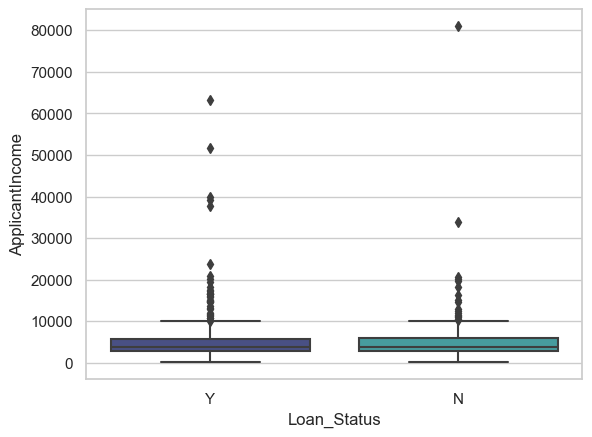

In [40]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=tk, palette="mako");

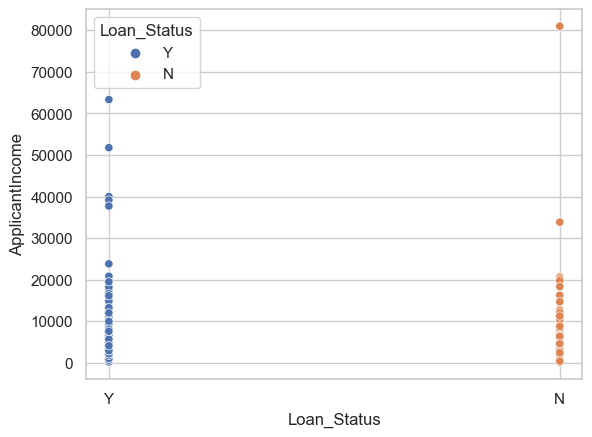

In [41]:
sns.scatterplot(x="Loan_Status", y="ApplicantIncome", data=tk, hue='Loan_Status');

- we can see that there are fewer outliers for the rejeceted N ones that the accepeted ones Y

#### PREPROCESSING DATA

###### What is data preprocessing?

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning mode

###### Why data preprocessing?
- It is important because real-world data is often incomplete, noisy, and inconsistent, which can lead to inaccurate and unreliable results if not properly handled. 
- Data preprocessing helps to ensure that the data is accurate, complete, and consistent, which improves the quality and     reliability of any analysis or model built on top of it.

In [42]:
# the first step is to check if there any missing/null values from the dataset
tk.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
# we can see that some columns have a lot missing values like Credit_History and some with no missing values like LoanID

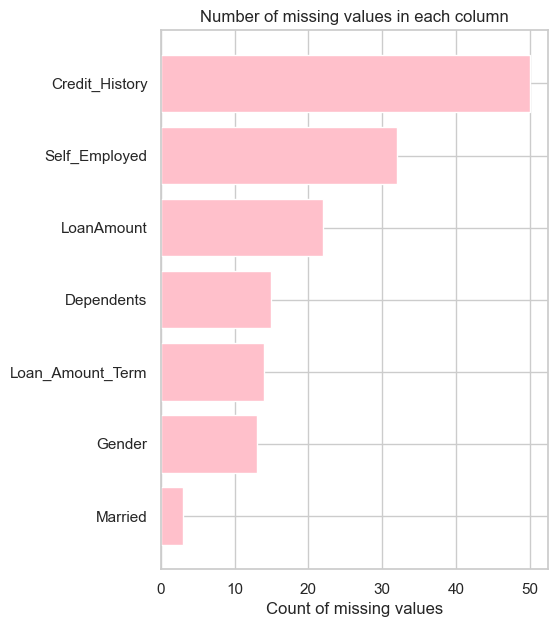

In [44]:
missing_tk = tk.isnull().sum(axis=0).reset_index()
missing_tk.columns = ['column_name','missing_count']
missing_tk = missing_tk[missing_tk['missing_count']>0]
missing_tk = missing_tk.sort_values(by='missing_count')

ind = np.arange(missing_tk.shape[0])
width = 0.1
fig,ax = plt.subplots(figsize=(5,7))
rects = ax.barh(ind,missing_tk.missing_count.values,color='pink')
ax.set_yticks(ind)
ax.set_yticklabels(missing_tk.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [45]:
# this is a visualization of the missing values in each column

In [46]:
# Dropping columns that are not necessary
tk = tk.drop(['Loan_ID'], axis = 1)

#### data imputation
- Data imputation is the process of estimating missing or incomplete values in a dataset using statistical techniques.
- Data imputation is important because missing data can lead to biased or inaccurate results in statistical analyses. Incomplete datasets can also limit the scope of research and reduce the power of statistical test

In [47]:
# imputing numerical variables 
# the only numerical variable with missing values is loan amount , so we will impute the missing values with the mean 
# The mean imputation method involves replacing missing values with the mean value of the loan amount variable the mean is a reasonable estimate of the typical value for many types of data


tk['LoanAmount'].fillna(tk['LoanAmount'].mean(),inplace=True)

In [48]:
# imputing categorical variables 
# missing values for categorical variables are imputed with the mode 
# Imputing missing values of categorical variables with mode is often done because it is a simple and efficient way to
#filling the missing data. Mode imputation involves replacing missing values with the most common value for that particular variable.

tk['Married'].fillna(tk['Married'].mode()[0],inplace=True)
tk['Gender'].fillna(tk['Gender'].mode()[0],inplace=True)
tk['Loan_Amount_Term'].fillna(tk['Loan_Amount_Term'].mode()[0],inplace=True)
tk['Dependents'].fillna(tk['Dependents'].mode()[0],inplace=True)
tk['Self_Employed'].fillna(tk['Self_Employed'].mode()[0],inplace=True)
tk['Credit_History'].fillna(tk['Credit_History'].mode()[0],inplace=True)

In [49]:
# checking if there is still any missing values after imputation
tk.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
# we can note that there no longer any missing values 

In [51]:
# multiplying for interest rates
tk['Loan_Amount_Term'] = (tk['Loan_Amount_Term']/10)
tk['ApplicantIncome'] = (tk['ApplicantIncome']*1000)
tk['CoapplicantIncome'] = (tk['CoapplicantIncome']*1000)
tk['LoanAmount'] = (tk['LoanAmount']*100000)

In [52]:
# we are going to be joining two columns into a single column that applicant income and co applicant income
# joining columns can help improve model performances etc
tk['ApplicantIncome'] = tk['ApplicantIncome'] + tk['CoapplicantIncome']
tk = tk.drop(columns = ['CoapplicantIncome'], axis = 1)


In [53]:
# replacing letters with figures for categorical data , this is good for predictions
tk = tk.replace({'Married':{'No':0,'Yes':1}})
tk = tk.replace({'Gender':{'Female':0,'Male':1}})
tk = tk.replace({'Education':{'Graduate':1,'Not Graduate':0}})
tk = tk.replace({'Self_Employed':{'Yes':1,'No':0}})
tk = tk.replace({'Property_Area':{'Semiurban':1,'Rural':0,'Urban':2}})


In [54]:
tk = tk.replace({'Dependents':{'3+':3}})

In [55]:
X = tk.drop(["Loan_Status"], axis=1)
y = tk["Loan_Status"]

In [56]:
tk.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849000.0,1.464122e+07,36.0,1.0,2,Y
1,1,1,1,1,0,6091000.0,1.280000e+07,36.0,1.0,0,N
2,1,1,0,1,1,3000000.0,6.600000e+06,36.0,1.0,2,Y
3,1,1,0,0,0,4941000.0,1.200000e+07,36.0,1.0,2,Y
4,1,0,0,1,0,6000000.0,1.410000e+07,36.0,1.0,2,Y


#### Splitting the Data set (Train,test split)

- the dataset is split into two different categories that is train and test data
- The training set is used to build and optimize the model, while the testing set is used to evaluate its performance
- By evaluating the model's performance on a separate testing set, we can estimate how well the model will perform on new, unseen data in the future

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [58]:
# have split the dataset into two , for test we have put 25% of the dataset and 75% for training the model

### Model Training 

#### Model 1 Decision Tree

- A decision tree classifier is a type of machine learning algorithm used for classification tasks.



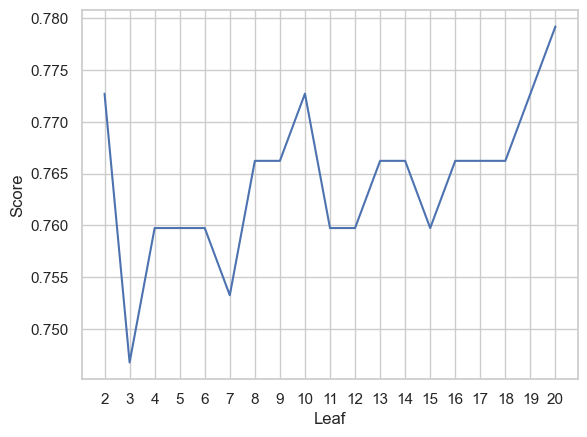

Decision Tree Accuracy: 77.92%


In [59]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

- The results show that there is 77.92% accuracy through the decision tree classification

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.7467532467532467
Confusion matrix:
 [[31 23]
 [16 84]]


### K -Nearest Neighbour KNN

- It is a type of machine learning algorithm that can be used for both classification and regression problems. 
- The basic idea behind KNN is to find the K closest data points in the training set to a given test point, and then use the labels or values associated with those K points to make a prediction.

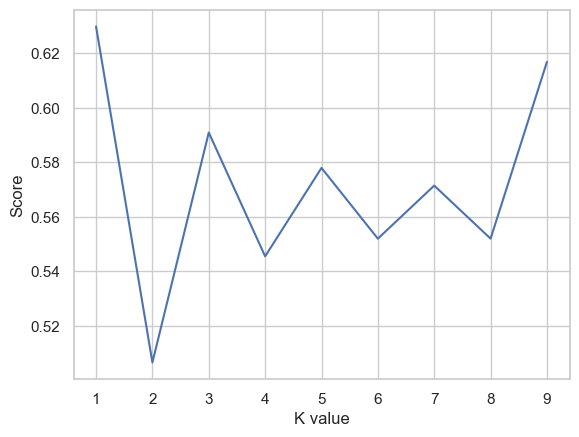

KNN best accuracy: 62.99%


In [61]:
scoreListknn = []
for i in range(1,10):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,10), scoreListknn)
plt.xticks(np.arange(1,10,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

- The results show an accuracy of 62.99% using k nearest neighbour 

### Random Forest
-  is a supervised learning algorithm that works on the concept of bagging. In bagging, a group of models is trained on different subsets of the dataset, and the final output is generated by collating the outputs of all the different models

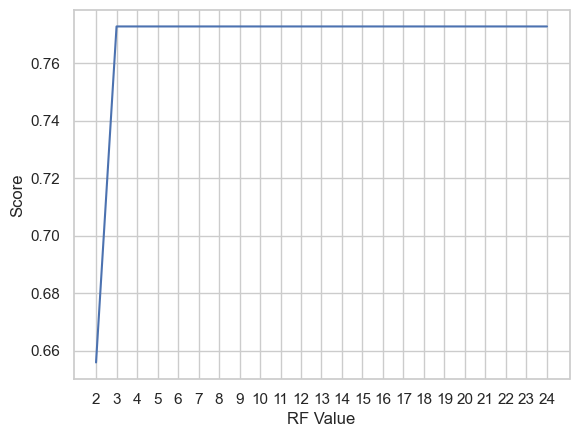

Random Forest Accuracy:  77.27%


In [62]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

- The results show that for random forest modeling there 77.27% accuracy

### Logistic Regression 
-  Logistic regression is a type of statistical model that is used to analyze and predict the relationship between a binary outcome variable (one that takes on only two values, such as "yes" or "no") and one or more predictor variables. 
- The goal is to find the best way to separate the two classes based on the predictor variables.

In [63]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=42)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        54
           Y       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154

[[  0  54]
 [  0 100]]
LR accuracy: 64.94%


- The results show that the accuracy for logistic regression is 64.94%

In [64]:
import warnings
warnings.filterwarnings('ignore')

### Support Vector Machine (SVM)

- The main idea behind SVMs is to find the hyperplane that best separates the data points into different classes. The hyperplane with the maximum margin from the nearest data points is considered the optimal solution.

In [65]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        54
           Y       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154

[[  0  54]
 [  0 100]]
SVC accuracy: 64.94%


### Gaussian NB 

- Gaussian Naive Bayes (GNB) is a type of probabilistic classification algorithm that assumes the features are independent and follows a normal distribution. The algorithm uses Bayes' theorem to calculate the probability of each class, given the input data

In [66]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           N       0.57      0.07      0.13        54
           Y       0.66      0.97      0.79       100

    accuracy                           0.66       154
   macro avg       0.62      0.52      0.46       154
weighted avg       0.63      0.66      0.56       154

[[ 4 50]
 [ 3 97]]
Gaussian Naive Bayes accuracy: 65.58%


### Gradient Boosting 
- Gradient Boosting is an ensemble learning method that combines multiple weak models (usually decision trees) to create a strong model. The idea is to iteratively add new models to the ensemble, each one correcting the errors of its predecessors

In [67]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [68]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [69]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=1, max_leaf_nodes=40, n_estimators=200,
                           subsample=1)
0.8152173913043479
{'subsample': 1, 'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 1}
3


In [70]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           N       0.69      0.50      0.58        54
           Y       0.77      0.88      0.82       100

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154

[[27 27]
 [12 88]]
Gradient Boosting accuracy: 74.68%


- The results show 74.68% accuracy using the gradient boosting modeling

### Categorical Naive Bayes

- Categorical Naive Bayes (CNB) is a type of probabilistic classification algorithm that is specifically designed for discrete feature data, such as text data or categorical data. 
- The algorithm uses Bayes' theorem to calculate the probability of each class, given the input data.

In [71]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           N       0.91      0.37      0.53        54
           Y       0.74      0.98      0.84       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.69       154
weighted avg       0.80      0.77      0.73       154

[[20 34]
 [ 2 98]]
Categorical Naive Bayes accuracy: 76.62%


## Comparing the Models

In [72]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Decision Tree,77.922078
6,Random Forest,77.272727
3,Categorical NB,76.623377
7,Gradient Boost,74.675325
4,Gaussian NB,65.584416
0,Logistic Regression,64.935065
2,SVM,64.935065
1,K Neighbors,62.987013


In [73]:
##Create a classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuray is ', model.score(x_train, y_train)*100)
    
    #using cross validation to further check accuracy
    score = cross_val_score(model, x, y, cv = 5)
    print('Cross Validation is', np.mean(score)*100)

In [74]:
tk.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849000.0,1.464122e+07,36.0,1.0,2,Y
1,1,1,1,1,0,6091000.0,1.280000e+07,36.0,1.0,0,N
2,1,1,0,1,1,3000000.0,6.600000e+06,36.0,1.0,2,Y
3,1,1,0,0,0,4941000.0,1.200000e+07,36.0,1.0,2,Y
4,1,0,0,1,0,6000000.0,1.410000e+07,36.0,1.0,2,Y


#### Testing different models for prediction 

In [75]:
# starting with decision tree with the highest accuracy 

DTclassifier.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])

array(['Y'], dtype=object)

In [76]:
# random forest 
RFclassifier.predict([[0,1,0,1,0,10000000,6000000,48,1,0]])

array(['Y'], dtype=object)

In [77]:
# Categoroical NB
NBclassifier1.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])

array(['N'], dtype='<U1')

In [78]:
# gradient boost 
GBclassifier.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])

array(['Y'], dtype=object)

In [79]:
#Gaussian NB
NBclassifier2.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])

array(['Y'], dtype='<U1')

In [80]:
# Logistic Regression
LRclassifier.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])

array(['Y'], dtype=object)

In [81]:
# Support Vector Machine
SVCclassifier.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])

array(['Y'], dtype=object)

In [82]:
#K -Nearest Neighbour KNN
KNclassifier.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])

array(['Y'], dtype=object)

In [83]:
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=20)

In [84]:
import pickle 
filename = 'DTclassifier2.sav'
pickle.dump(DTclassifier, open(filename, 'wb'))

In [85]:
load_model = pickle.load(open(filename,'rb'))

In [91]:
load_model.predict([[0,1,0,0,0,1000000,6000000,48,1,0]])

array(['N'], dtype=object)

In [87]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0,1,0,9083000.0,22800000.0,36.0,1.0,1
377,1,1,0,1,0,4310000.0,13000000.0,36.0,1.0,1
163,1,1,2,1,0,5614000.0,15800000.0,36.0,1.0,0
609,0,0,0,1,0,2900000.0,7100000.0,36.0,1.0,0
132,1,0,0,1,0,2718000.0,7000000.0,36.0,1.0,1


In [88]:
load_model.predict([[0,1,0,0,0,10000000,6000000,48,1,0]])[0]

'Y'